In [1]:
library(broom)
library(latex2exp)
library(tidymodels)
library(repr)
library(gridExtra)
library(faraway)
library(mltools)
library(leaps)
library(glmnet)
library(cowplot)
library(tidyverse)
library(modelr)
library(ggplot2)
library(dplyr)
library(car)
library(infer)
library(modelr)
library(qqplotr)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ dials        1.2.1     ✔ rsample      1.2.1
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.5.1     ✔ tidyr        1.3.1
✔ infer        1.0.7     ✔ tune         1.2.1
✔ modeldata    1.4.0     ✔ workflows    1.1.4
✔ parsnip      1.2.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.2     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘mltools’


The following objects are masked from ‘package:yardstick’:

    mcc, rmse


The following object is masked from ‘pa

## Data Description  ##

The dataset is called diabetes.csv, comes from https://www.kaggle.com/datasets/whenamancodes/predict-diabities/data. 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains 768 different observations. All patients here are females at least 21 years old of Pima Indian heritage. The 9 variables for each observation are as follows:

- `Pregnancies`   **Numerica Variable**. To express the Number of pregnancies.

- `Glucose`	**Numerica Variable**. To express the Glucose level in blood

- `BloodPressure` **Numerica Variable**.	To express the Blood pressure measurement

- `SkinThickness`**Numerica Variable**.	To express the thickness of the skin

- `Insulin`	**Numerica Variable**. To express the Insulin level in blood

-  `BMI`	**Numerica Variable**. To express the Body mass index

-  `DiabetesPedigreeFunction` **Numerica Variable**. To express the Diabetes percentage

-  `Age` **Numerica Variable**.	To express the age

-  `Outcome` **Categorical Variable**.	To express the final result 1 is Yes and 0 is No


## Question ##

In this dataset, we will answer the following question: **Is there a statistically significant association between diabetes and the insulin level in blood and body mass index (BMI)?** This dataset contains values for `Insulin` and `BMI`, allowing us to make a model of it. We will create different models and use statistical inference to see if the Insulin level in blood and Body mass index is statistically associated with diabetes.

In [2]:
diabetes_data <- read_csv("diabetes.csv")

head(diabetes_data)
sum(is.na(diabetes_data))

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


[1] 0

We can see there are not missing value for our dataset, so next step we could make a subset with just variables of Outcome (1 = diabetes, 0 = no diabetes), BMI and Insulin.

In [3]:
variables <- 
    diabetes_data %>%
    select(Insulin, BMI, Outcome)
head(variables)

Insulin,BMI,Outcome
<dbl>,<dbl>,<dbl>
0,33.6,1
0,26.6,0
0,23.3,1
94,28.1,0
168,43.1,1
0,25.6,0


Now that we have our variables of interest, we can make a regression. Since our response variable is binary, we will use a Logistic regression to model diabetes in BMI and Insulin.

In [4]:
logistic_model <- glm(Outcome ~ Insulin + BMI, data = diabetes_data, family = "binomial")

summary(logistic_model)


Call:
glm(formula = Outcome ~ Insulin + BMI, family = "binomial", data = diabetes_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.6764997  0.4094549  -8.979  < 2e-16 ***
Insulin      0.0013764  0.0006769   2.033    0.042 *  
BMI          0.0896959  0.0121765   7.366 1.75e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 916.56  on 765  degrees of freedom
AIC: 922.56

Number of Fisher Scoring iterations: 4


Now we can make a visualization of the data. We can use boxplot to explore 

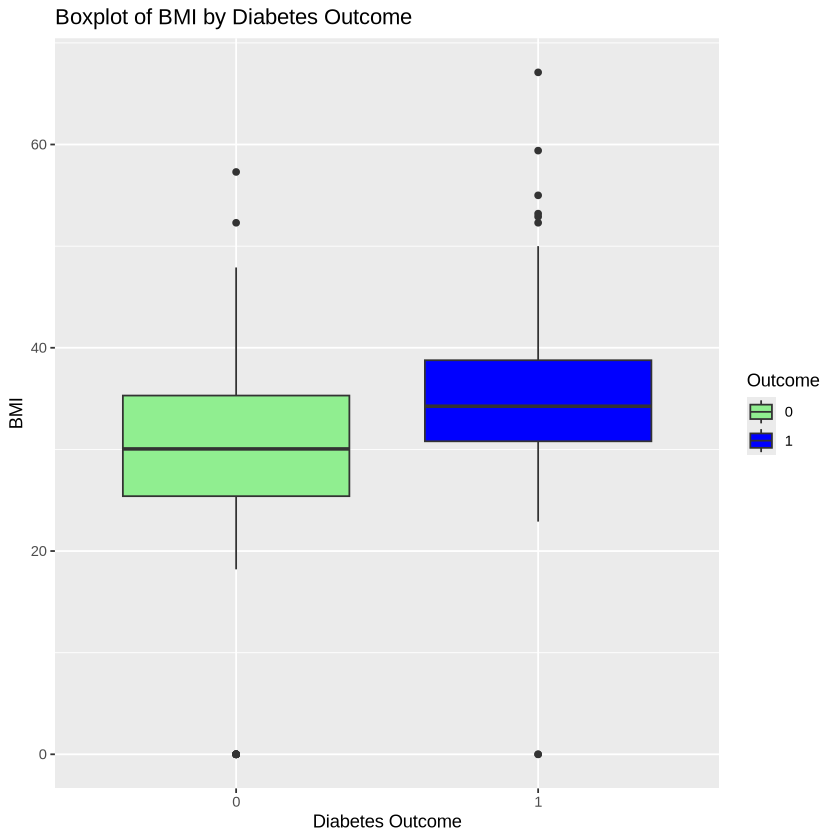

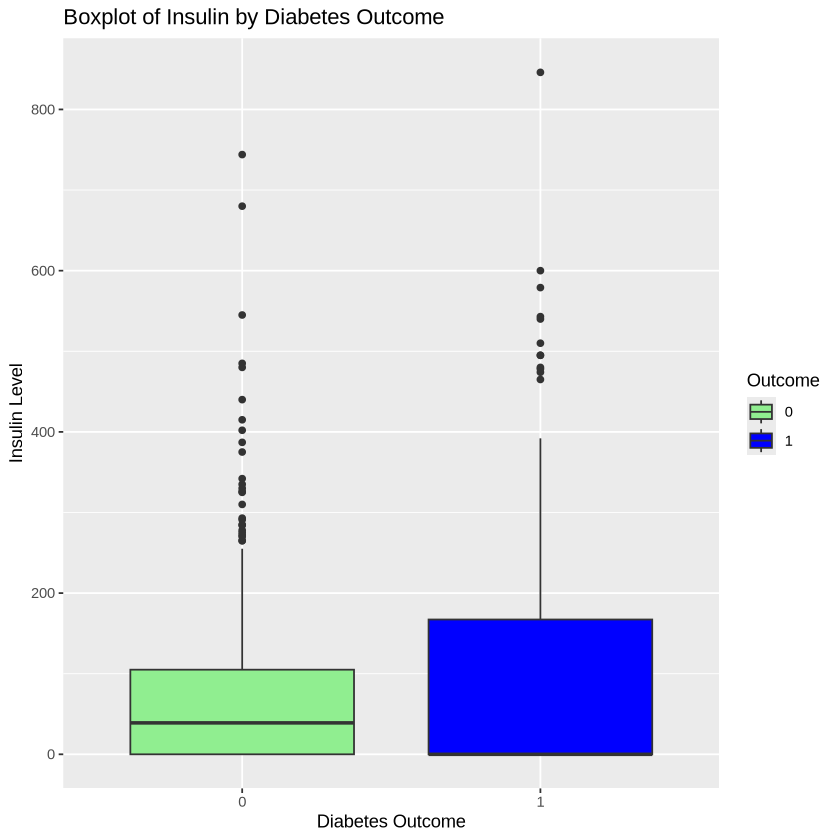

In [5]:
ggplot(variables) +
  geom_boxplot(aes(x = as.factor(Outcome), y = BMI, fill = as.factor(Outcome))) +
  labs(title = "Boxplot of BMI by Diabetes Outcome", x = "Diabetes Outcome", y = "BMI", fill = "Outcome") +
  scale_fill_manual(values = c("0" = "lightgreen", "1" = "blue")) 

ggplot(variables) +
  geom_boxplot(aes(x = as.factor(Outcome), y = Insulin, fill = as.factor(Outcome))) +
  labs(title = "Boxplot of Insulin by Diabetes Outcome", x = "Diabetes Outcome", y = "Insulin Level", fill = "Outcome") +
  scale_fill_manual(values = c("0" = "lightgreen", "1" = "blue"))


We can see that each group contains outliers. This indicates that the data is not suitable for analyzing just one explanatory variable and we should consider other variables to explain the effect of BMI and Insulin on Outcome.

- Individuals with diabetes (Outcome = 1) generally have a higher median BMI compared to those without diabetes (Outcome = 0). This suggests a potential association between BMI and diabetes, where higher BMI might be linked to an increased likelihood of having diabetes. 

- The boxplot for individuals with diabetes (Outcome = 1) has a greater range and many high outliers. This could indicate that people with diabetes are more likely to have elevated insulin levels.

# Further Plan

We may do some test like vif, qqplot, residual etc to help us improve our model.

Since diabetes is a binary variable (1 = diabetes, 0 = no diabetes), linear regression would not be suitable for creating a model. Instead, we can use logistic regression, which is appropriate. It allows us to explore how Insulin levels and Body Mass Index (BMI) are associated with the likelihood of diabetes.

## Assumption

- Each observation should be independent of the others.
- residuals have equal variance (Homoscedasticity) for all levels of the predictors.
- not Multicollinearity
- Larger sample size

## Limitation
- Extreme values in Insulin or BMI can disproportionately influence the model, potentially skewing results.
- If there is a high correlation between Insulin and BMI, it may affect the stability of the model.

In [6]:
logistic_model <- glm(Outcome ~ Insulin + BMI, data = diabetes_data, family = "binomial")
summary(logistic_model)
tidy(logistic_model,conf.int=TRUE)


Call:
glm(formula = Outcome ~ Insulin + BMI, family = "binomial", data = diabetes_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.6764997  0.4094549  -8.979  < 2e-16 ***
Insulin      0.0013764  0.0006769   2.033    0.042 *  
BMI          0.0896959  0.0121765   7.366 1.75e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 993.48  on 767  degrees of freedom
Residual deviance: 916.56  on 765  degrees of freedom
AIC: 922.56

Number of Fisher Scoring iterations: 4


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-3.676499656,0.4094549405,-8.979009,2.732161e-19,-4.500203e+00,-2.894305003
Insulin,0.001376367,0.0006768768,2.033408,4.201132e-02,5.231086e-05,0.002716168
BMI,0.089695851,0.0121765307,7.366290,1.754425e-13,6.636288e-02,0.114125985


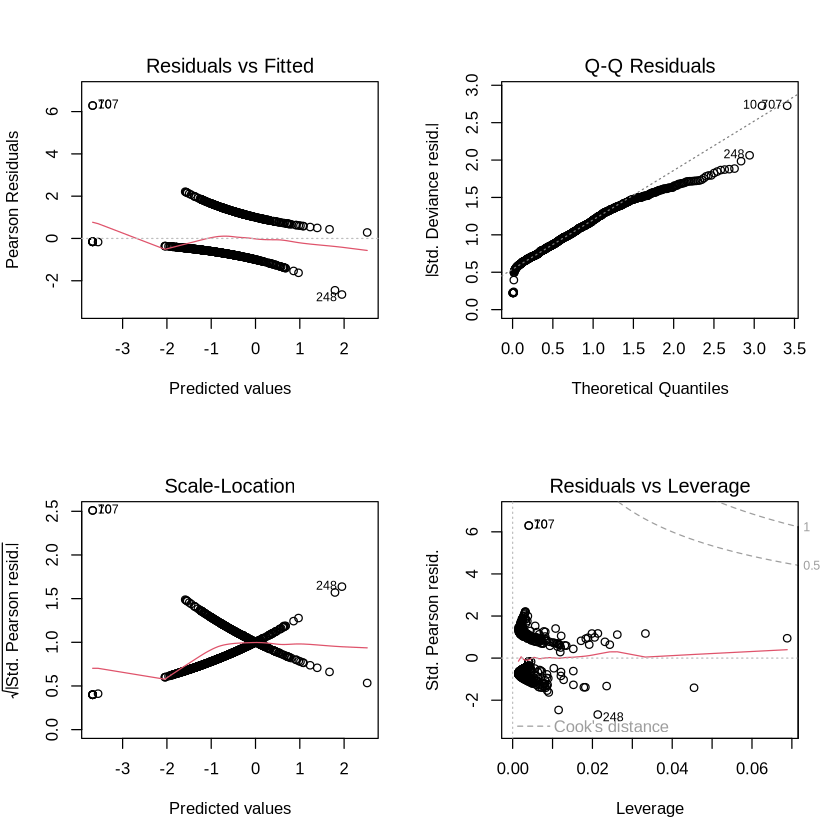

In [7]:
par(mfrow=c(2,2))
plot(logistic_model)

In [8]:
vif(logistic_model)

Insulin      BMI 
1.019247 1.019247